In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def calculate_investment_growth(P, r, months, max_trades):
    """Calculate investment growth for different numbers of trades."""
    investment_curves = {}
    
    for n_trades in range(1, max_trades + 1):
        investment_values = [P]
        
        for m in range(1, months + 1):
            monthly_profit = investment_values[-1] * (r * n_trades)  # Monthly profit
            new_value = investment_values[-1] + monthly_profit  # New investment value
            investment_values.append(round(new_value))
        
        investment_curves[n_trades] = investment_values

    return investment_curves

def plot_investment_growth (investment_curves, r, months):
    """Plot the investment growth curves with synchronized axes."""
    month_range = np.arange(0, months + 1)
    
    # Create the figure and the left axis
    fig, ax_left = plt.subplots(figsize=(12, 8))
    
    # Plotting the investment growth curves on the left axis
    for n_trades, values in investment_curves.items():
        ax_left.plot(month_range, values, marker='o', alpha=0.5, label=f'{n_trades} Wins/Month')
    
    # Calculate consistent y-axis limits across both axes
    y_min, y_max = min(min(values) for values in investment_curves.values()), max(max(values) for values in investment_curves.values())
    y_padding = 0.1 * (y_max - y_min)
    y_min, y_max = y_min - y_padding, y_max + y_padding
    ax_left.set_ylim(y_min, y_max)

    # Ensure ticks are identical
    y_ticks = ax_left.get_yticks()

    # Apply consistent formatting for both axes
    currency_formatter = plt.FuncFormatter(lambda x, _: f'${int(x):,}')
    ax_left.yaxis.set_major_formatter(currency_formatter)

    # Add annotation text
    ax_left.text(0.5, 0.5, f'@{round(r*100, 2)}% Profit', transform=ax_left.transAxes, 
                 fontsize=50, color='grey', alpha=0.2,
                 horizontalalignment='center', verticalalignment='center',
                 rotation=0, weight='bold', style='italic')

    # Customizing the plot
    ax_left.set_title(f'Investment Growth @{round(r*100, 2)}% Profit')
    ax_left.set_xlabel('Months')
    ax_left.set_ylabel('Investment Value ($)')
    ax_left.set_xticks(month_range)
    ax_left.grid()
    ax_left.legend(title='Successful Trades')
    plt.tight_layout()
    plt.show()
    
def plot_investment_growth2(investment_curves, x, r, months):
    """Plot the investment growth curves."""
    month_range = np.arange(0, months + 1)
    
    # Create the figure and the left axis
    fig, ax_left = plt.subplots(figsize=(12, 8))
    
    # Plotting the investment growth curves on the left axis
    for n_trades, values in investment_curves.items():
        ax_left.plot(month_range, values, marker='o', alpha=0.5, label=f'{n_trades} Trades/Month')
    
    ax_left.plot(month_range, x, color='blue', linewidth = 7, alpha=0.5,  label=f'Actual Profits')
    
    # Create the right axis as a twin of the left axis
    #ax_right = ax_left.twinx()
    
    # Set the y-axis limits and ticks on the right to match the left
    #ax_right.set_ylim(ax_left.get_ylim())
    #ax_right.set_yticks(ax_left.get_yticks())
    #ax_right.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x):,}'))  # Format y-axis as currency

    ax_left.text(0.5, 0.5, f'@{round(r*100, 2)}% Profit', transform=ax_left.transAxes, 
                fontsize=50, color='grey', alpha=0.2,  # Adjust transparency here
                horizontalalignment='center', verticalalignment='center',
                rotation=0, weight='bold', style='italic')

    # Customising the plot
    ax_left.set_title(f'Investment Growth @{round(r*100, 2)}% Profit')
    ax_left.set_xlabel('Months')
    ax_left.set_ylabel('Investment Value ($)')
    #ax_right.set_ylabel('Investment Value ($)')  # Y-axis label for the right side
    ax_left.set_xticks(month_range)
    ax_left.grid()
    ax_left.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x):,}'))  # Format left y-axis as currency
    ax_left.legend(title='Successful Trades')
    plt.tight_layout()
    plt.show()

def create_investment_dataframe(investment_curves, months):
    """Create a dataframe from investment curves."""
    month_range = np.arange(0, months + 1)
    df_investments = pd.DataFrame(investment_curves, index=month_range)
    df_investments.index.name = 'Month'
    
    return df_investments


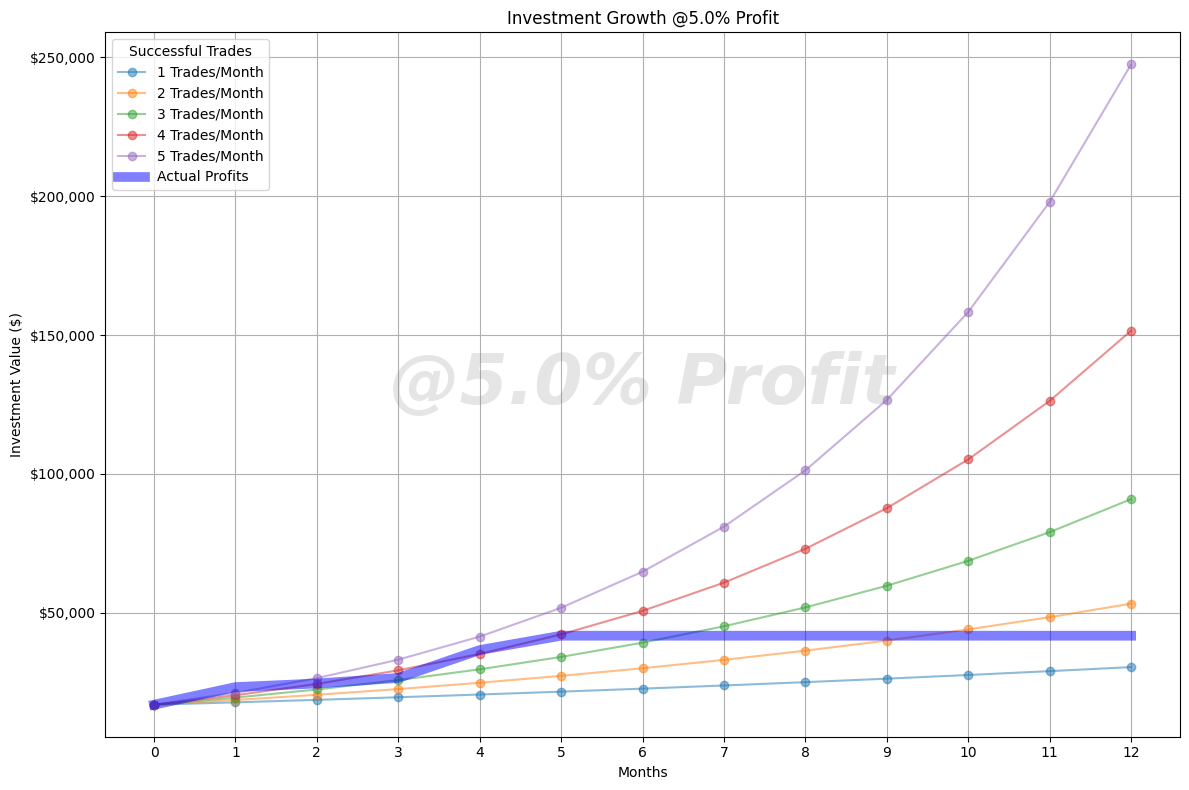

           1      2      3       4       5
Month                                     
0      17000  17000  17000   17000   17000
1      17850  18700  19550   20400   21250
2      18742  20570  22482   24480   26562
3      19679  22627  25854   29376   33202
4      20663  24890  29732   35251   41502
5      21696  27379  34192   42301   51878
6      22781  30117  39321   50761   64848
7      23920  33129  45219   60913   81060
8      25116  36442  52002   73096  101325
9      26372  40086  59802   87715  126656
10     27691  44095  68772  105258  158320
11     29076  48504  79088  126310  197900
12     30530  53354  90951  151572  247375


In [3]:
# Main function to run the investment growth analysis

# Investment parameters
P = 17000 # Initial investment ($)
r = 0.05 # Monthly profit rate (2%)
months = 12  # Investment duration (months)
max_trades = 5 # Maximum number of trades

actual = [0, 6328, 1302, 2000, 10040, 5154, 
          0, 0, 0, 0, 0, 0, 0]

y = P + np.cumsum(actual)

investment_curves = calculate_investment_growth(P, r, months, max_trades)

#plot_investment_growth(investment_curves, r, months)
plot_investment_growth2(investment_curves, y, r, months)
df_investments = create_investment_dataframe(investment_curves, months)
print(df_investments)


##### WINNING TRADES & COMPOUNDING GOALS

Initial Capital: $ 31000
Net Profit: $ 115414 .... 472.3 %
Total Fees: $ 675
---------


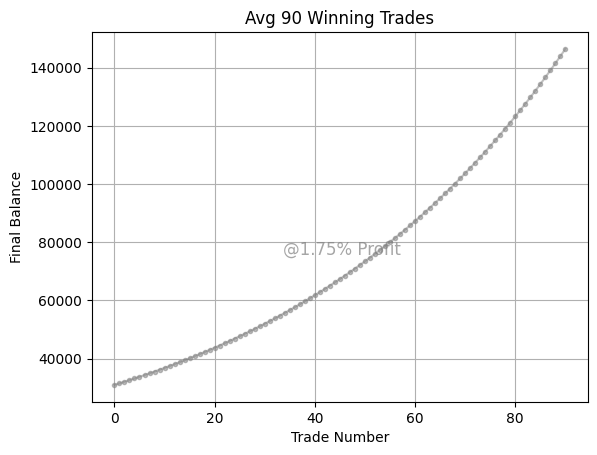

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

initial_capital = 31000
num_trades = 90
r = 1.75  # Fixed Profit
fee_percent = 0.01  # Trading fee of 1%

# Calculate the balance after each trade, factoring in the fee
balance = [initial_capital]
fees = [0]
for _ in range(num_trades):
    profit = balance[-1] * r / 100
    new_balance = balance[-1] + profit
    fee = new_balance * fee_percent / 100
    nb = round(new_balance - fee)
    fees.append(fee)
    balance.append(nb)

# Create a time series for the x-axis
time_series = np.arange(num_trades + 1)

fig, ax = plt.subplots()

# Plot the balance over time
plt.plot(time_series, balance, marker='o', markersize=3, color='grey', alpha=0.5)

# Adjust text position to fit within the plot
text_x = len(time_series) / 2  # Center horizontally
text_y = np.mean(balance)

ax.text(text_x, text_y, f'@{round(r, 2)}% Profit', 
         fontsize=12, color='grey', alpha=0.7, 
         horizontalalignment='center', verticalalignment='bottom')

ax.set_xlabel("Trade Number")
ax.set_ylabel("Final Balance")
ax.set_title(f"Avg {num_trades} Winning Trades")

ax.grid(True)

# Calculate the net profit and gain percentage
np = round(balance[-1] - initial_capital)
gain = round(balance[-1]*100/initial_capital, 2)

print("Initial Capital: $", initial_capital)
print("Net Profit: $", np, "....", gain, "%")
print('Total Fees: $', round(sum(fees)))
print ("---------")
data = pd.DataFrame({'Trades': time_series, 
                     'Balance': balance,
                    'Fees': fees})
data.index.name = 'Trades'
#print(data)